# 3D Image Visualization with PyVista

Installation: `pip install pyvista trame trame-vtk trame-vuetify trame-components`

In [54]:
import pyvista as pv
from pyvista import examples
import tifffile
import numpy
import matplotlib.pyplot as plt

## Load data

Complete example: [Volume Rendering (PyVista)](https://docs.pyvista.org/examples/02-plot/volume#sphx-glr-examples-02-plot-volume-py)

In [21]:
cyl = tifffile.imread("03-delta.tif")[::-1]
print(f"{cyl.shape = }")
print(f"{cyl.size = }")

cyl.shape = (200, 200, 200)
cyl.size = 8000000


## Traditional slices

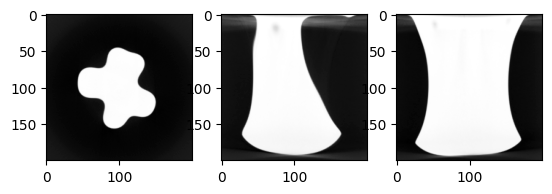

In [68]:
plt.subplot(1,3,1)
plt.imshow(cyl[cyl.shape[0]//2][::-1], cmap='Greys_r')
plt.subplot(1,3,2)
plt.imshow(cyl[:,cyl.shape[1]//2][::-1], cmap='Greys_r')
plt.subplot(1,3,3)
plt.imshow(cyl[:,:,cyl.shape[2]//2][::-1], cmap='Greys_r')
plt.show()

## Mean projections

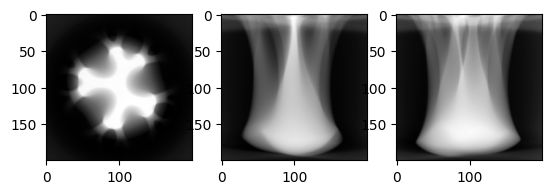

In [67]:
plt.subplot(1,3,1)
plt.imshow(numpy.mean(cyl, axis=0)[::-1], cmap='Greys_r')
plt.subplot(1,3,2)
plt.imshow(numpy.mean(cyl, axis=1)[::-1], cmap='Greys_r')
plt.subplot(1,3,3)
plt.imshow(numpy.mean(cyl, axis=2)[::-1], cmap='Greys_r')
plt.show()

## Render Volume in PyVista

In [65]:
plotter = pv.Plotter()
plotter.add_volume(cyl, opacity='geom', cmap="Greys_r", shade=True)
plotter.camera_position='yx'
plotter.show()

Widget(value='<iframe src="http://localhost:41469/index.html?ui=P_0x7f7e0bfb4250_44&reconnect=auto" class="pyv…

 JS Error => TypeError: Cannot create proxy with a non-object as target or handler


## Apply threshold and render, these are cubes

In [28]:
def to_pyvista(image: numpy.ndarray) -> pv.ImageData:
    """Convert a 3D numpy array to PyVista volume for rendering"""
    volume = pv.ImageData(dimensions=numpy.array(image.shape) + 1)
    volume.cell_data["values"] = image.flatten(order="F")
    return volume

pvdata = to_pyvista(cyl)
vol = pvdata.threshold_percent(50, invert=0)
vol.plot(show_edges=True, show_scalar_bar=False, color='b', cpos='yx')

Widget(value='<iframe src="http://localhost:41469/index.html?ui=P_0x7f82132f3350_20&reconnect=auto" class="pyv…

 JS Error => TypeError: Cannot create proxy with a non-object as target or handler


## Extract a surface and triangulate it

In [25]:
surf = vol.extract_surface().triangulate()
print(surf.points.shape)
surf.plot(show_edges=True, show_scalar_bar=False, color='g', cpos='yx')

(181978, 3)


Widget(value='<iframe src="http://localhost:41469/index.html?ui=P_0x7f7f31b07010_17&reconnect=auto" class="pyv…

 JS Error => TypeError: Cannot create proxy with a non-object as target or handler


## Simplify and smooth the surface

In [40]:
surfSmall = surf.decimate(0.99)
print(surfSmall.points.shape)
smooth = surfSmall.smooth(n_iter=100)
#smooth.plot(show_edges=True, show_scalar_bar=False, color='r')
plotter = pv.Plotter()
plotter.add_mesh(smooth, show_edges=True, show_vertices=True)
plotter.camera_position='yx'
plotter.show()

(1821, 3)


Widget(value='<iframe src="http://localhost:41469/index.html?ui=P_0x7f7f310ef150_31&reconnect=auto" class="pyv…

 JS Error => TypeError: Cannot create proxy with a non-object as target or handler


## What is this surface made of? It's a surface mesh

In [41]:
print(" -- POINTS -- ")
print(f"{surf.points = }")
print(f"{surf.points.shape = }")

print("\n\n\n\n -- CONNECTIVITY -- ")
print(f"{surf.regular_faces = }")
print(f"{surf.regular_faces.shape = }")

 -- POINTS -- 
surf.points = pyvista_ndarray([[199.,  94.,  13.],
                 [200.,  94.,  13.],
                 [200.,  94.,  14.],
                 ...,
                 [200., 102., 186.],
                 [199., 103., 186.],
                 [200., 103., 186.]], dtype=float32)
surf.points.shape = (181978, 3)




 -- CONNECTIVITY -- 
surf.regular_faces = array([[     0,      1,      3],
       [     2,      3,      1],
       [     0,      4,      1],
       ...,
       [181975, 181974, 181973],
       [181974, 181975, 181976],
       [181977, 181976, 181975]])
surf.regular_faces.shape = (363956, 3)


## Why is the rendering so nice? Surface normals!

In [51]:
smooth.compute_normals(cell_normals=False, point_normals=True, inplace=True)

plotter = pv.Plotter()
plotter.add_mesh(smooth, show_edges=True, show_vertices=True)
plotter.add_arrows(smooth.points, smooth['Normals']*10, color='k')
plotter.camera_position='yx'
plotter.show()

Widget(value='<iframe src="http://localhost:41469/index.html?ui=P_0x7f7eb903f890_41&reconnect=auto" class="pyv…

 JS Error => TypeError: Cannot create proxy with a non-object as target or handler


## We could also have built the mesh with skimage for example...

In [52]:
import skimage.measure
#points, conn = vispy.geometry.isosurface.isosurface(cyl, 128, )
points, conn, normals, values = skimage.measure.marching_cubes(cyl, 128, step_size=2, method='lewiner', )
connPV = numpy.hstack([numpy.ones((conn.shape[0], 1)) * 3, conn]).astype('<u2')

mesh = pv.PolyData(
        points,
        connPV)

print(f"{points.shape = }")
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges=True, show_vertices=True)
plotter.camera_position='yx'
plotter.show()

points.shape = (40633, 3)


Widget(value='<iframe src="http://localhost:41469/index.html?ui=P_0x7f7e45685510_42&reconnect=auto" class="pyv…

 JS Error => TypeError: Cannot create proxy with a non-object as target or handler
